# Imports

In [1277]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import random


# Implemenet K-means

In [1641]:
class KKMeans():
    def __init__(self,k):
        """
        Init method
        param k: number of clusters
        """
        self.k = k
        self.means = None
        pass
    
    
    def initialize_means(self,X,method='normal'):
        """
        Implement a method for initializing means with random data points
        param X: (n,d) numpy array
        
        """
        if(method =='normal'):
            self.means = np.array(random.choices(X,k=self.k))
#         else:
#             means = []
#             i = random.choice(range(len(X)))
#             initial = X[i]
#             means.append(initial)
#             dist = np.zeros((len(X),self.k-1))
#             for k in range(self.k-1):
#                 X = np.delete(X, initial,0)
#                 for i in X:
                    
#             initial = X[np.argmax(dist)]
#             means.append(initial)
#             self.means = means
#             print(self.means)
                 
    
    def fit(self,X,n_iter,alpha,initialize_method = 'normal'):
        """
        Main fit method.Need to
        1. Initialize means
        2. Iterate over samples and calcluate k's
        3. Recalculate means
        4. Repeat to converge(means dosent not change)
        """
        self.initialize_means(X,initialize_method)
        n=1
        r = np.zeros(len(X))
        potential_dist = np.zeros((len(X),self.k))
        diff = float('inf')
        while n!=n_iter:
            for i in range(self.k):
                potential_dist[:,i] = np.linalg.norm(X - self.means[i], axis=1)
            r = np.argmin(potential_dist, axis = 1)
            temp = self.means
            mean = []
            for i in range(self.k):
                mean.append(np.mean(X[r == i], axis=0))
            diff = np.linalg.norm(np.array(mean) - temp)
            n+=1
            if(diff<alpha):
                n = n_iter
            self.means = np.array(mean)
    
            
                         
    
    def predict(self,X):
        """
        Predict method
        Find and return nearest centroid
        """
        y_results = []
        for i in X:
            dist = []
            for k in self.means:
                dist.append(np.linalg.norm(i - k))
            y_results.append(np.argmin(dist))
        return np.transpose(y_results)
            
                
        
        
    

## 1. Test on IRIS dataset. 

1. Split IRIS dataset to 2 parts
2. Hide first part labels and fit unsupervised K-means method
4. On second part test accuracy 

In [1642]:
from sklearn import datasets

In [1643]:
iris = datasets.load_iris(return_X_y=True)

In [1644]:
X = iris[0]
y = np.squeeze(iris[1].reshape(-1,1), axis=1) 

In [1645]:
model = KKMeans(k=3)

In [1646]:
model.fit(X,20,0.001,'k++')

/home/levon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future


TypeError: list indices must be integers or slices, not tuple

In [1461]:
y_hat = model.predict(X)

In [1310]:
from sklearn.metrics import accuracy_score

In [1311]:
accuracy_score(y, y_hat)

0.8866666666666667

In [1312]:
from sklearn.cluster import KMeans

In [1313]:
model2  = KMeans(n_clusters=3)

In [1314]:
model2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [1315]:
accuracy_score(y, model2.predict(X))

0.8933333333333333

## 2. Image Segmentation  
Find Yellow and blue with K-means

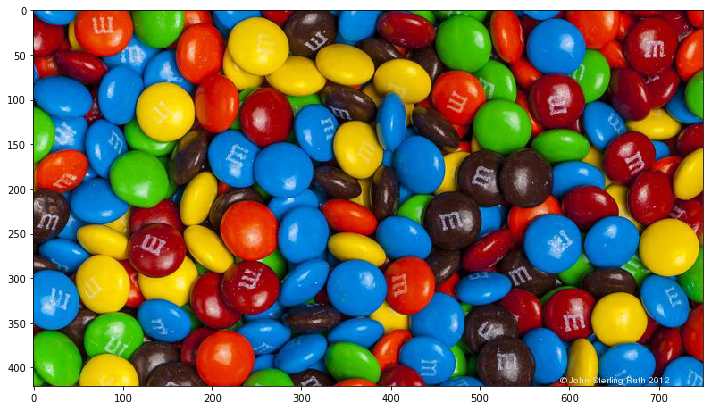

In [1316]:
img_path = "../Images/m_ms.jpg"
img = plt.imread(img_path)
plt.figure(figsize=(12,8))
plt.imshow(img);

In [1317]:
new_X = img.reshape(-1,3)

In [1318]:
model_img = KKMeans(3)

In [1319]:
model_img.fit(new_X,13,0.01)

In [1320]:
img_pred = model_img.predict(new_X)

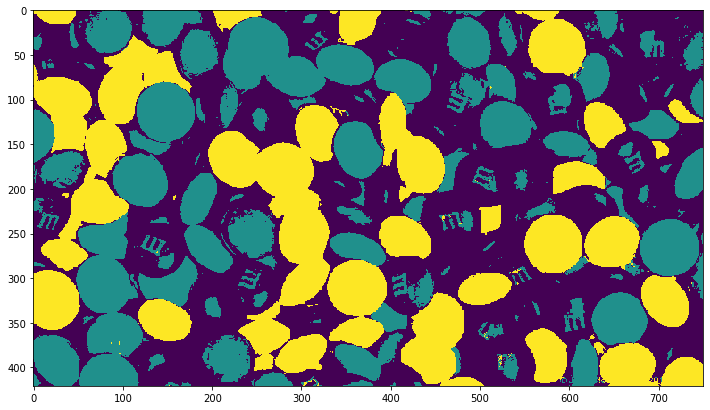

In [1321]:
plt.figure(figsize=(12,8))
plt.imshow(img_pred.reshape(421,750));